In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# MNIST IMAGE --> Tensors

In [7]:
transform = transforms.ToTensor()

In [8]:
train_data = datasets.MNIST(root='../Data',train=True,download=True,transform=transform)

In [9]:
test_data = datasets.MNIST(root='../Data',train=False,download=True,transform=transform)

In [10]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [11]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ../Data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [12]:
type(train_data)

torchvision.datasets.mnist.MNIST

In [16]:
train_data[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [17]:
image,label = train_data[0]

In [18]:
image.shape

torch.Size([1, 28, 28])

In [19]:
label

5

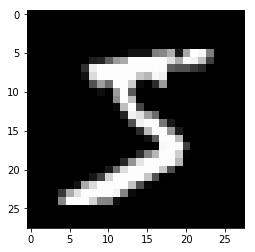

In [24]:
plt.imshow(image.reshape((28,28)),cmap='gray') #viridis, gist_yarg color-scale just for displaying purposes, in reality the image is gray scale

In [25]:
torch.manual_seed(101) # can be any number

# 0 images, 1 images, ...
train_loader = DataLoader(train_data,batch_size=100,shuffle=True) # feeding 100/60000 images at a time as a batch into network
# ^ shuffle = true that way networks gets to see all images, and doesn't just get good at 1 number

test_loader = DataLoader(test_data, batch_size=500, shuffle=False) # since this is going to be predicting, batch size doesn't really matter
# and shuffle doesnt really matter

In [26]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # for formatting, not important

In [27]:
# First batch
for images, labels in train_loader:
    # 60000 / 100 images, so for loop would iterate 60 times.
    break # so we only go over 1st batch

In [29]:
images.shape # 1st batch number only

torch.Size([100, 1, 28, 28])

In [30]:
labels.shape #1st batch labels only

torch.Size([100])

In [32]:
print('Labels: ', labels[:12].numpy())

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


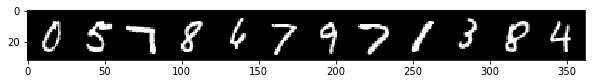

In [36]:
print('Labels: ', labels[:12].numpy())
# Print the first 12 images
im = make_grid(images[:12], nrow=12) # the default nrow is 8
plt.figure(figsize=(10,4))
# we need to transpose the images from CWH to WHC
plt.imshow(np.transpose(im.numpy(),(1,2,0)));